# <span style="color:blue">  Numerical exercises 2</span> Igor Vasiljevic 11191A

## In the following we use a Monte Carlo method to solve a 1D integral with two type of sampling: uniform and with importance sampling; choosing a (correctly normalized) distribution function similar to the integral function.

## Next we use Random Walk uniform and continuum to calculate  $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

M=10000              # Total number of throws
N=100              # Number of blocks
L=int(M/N)
x = np.arange(N)
x*=L # Number of throws = block * (Number of throws in each block)

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 20})

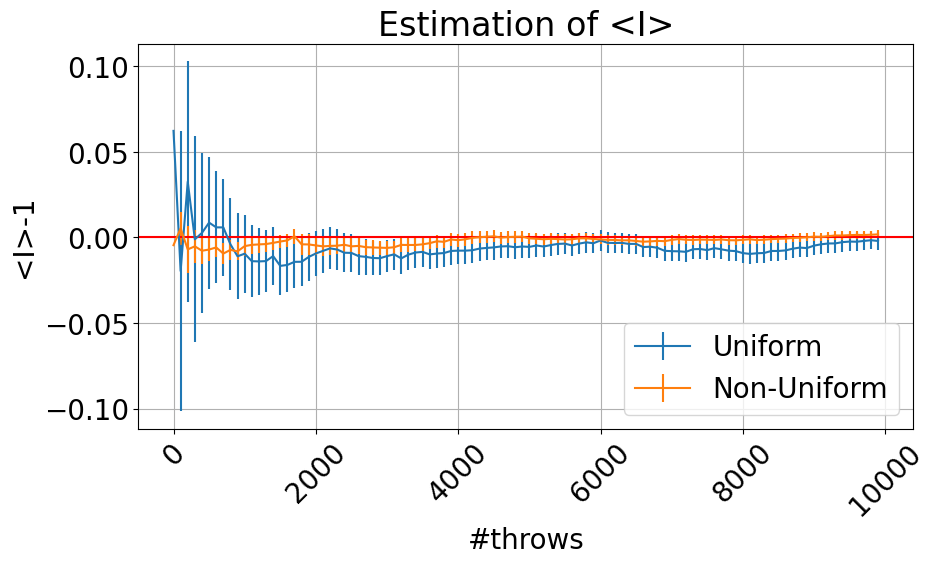

In [4]:
data = pd.read_csv("../Esercizio2/datiIntegral.dat", sep='\t')

plt.rcParams["figure.figsize"]=(10,5)
plt.errorbar(x,data["valUnif"]-1,yerr=data["errUnif"],mfc='red', label="Uniform")
plt.errorbar(x,data["valPx"]-1,yerr=data["errPx"],mfc='blue', label="Non-Uniform")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc="lower right")
plt.title('Estimation of <I>')
plt.xlabel('#throws')
plt.xticks(rotation = 45)
plt.ylabel('<I>-1')
plt.grid(True)
plt.show()

### The "goal" of this exercise was to dimostrate the accuracy of importance sampling with a distribution similar to our function. In this exercise we use the distribution inside a quarter of circle with radius 1. After i normalized i used the importance sampling in attempt to calculate the integral of the function.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 20})

M=10000              # Total number of throws
N=100              # Number of blocks
L=int(M/N)
x1 = np.arange(N)
x1*=L # Number of throws = block * (Number of throws in each block)

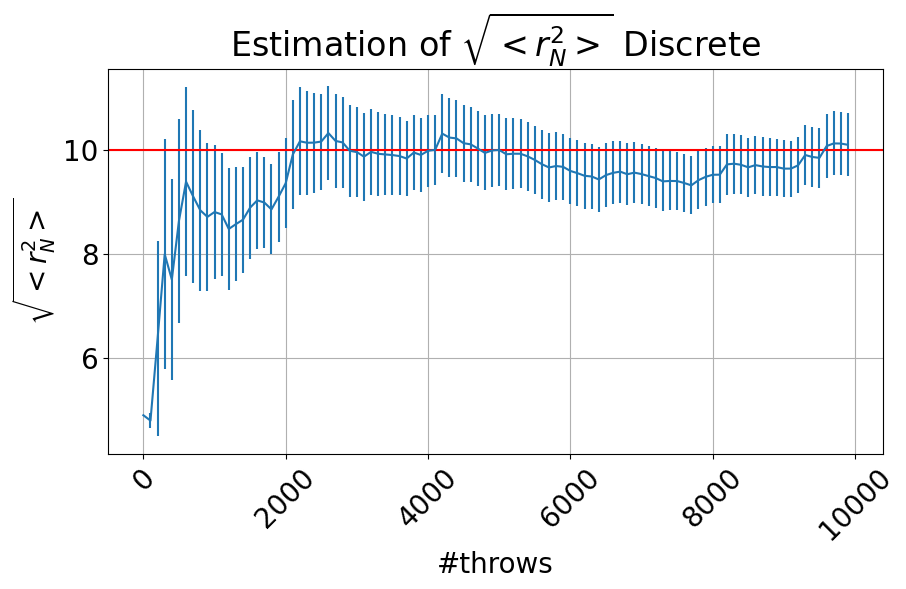

In [8]:
data4 = pd.read_csv("../Esercizio2/dati.dat", sep='\t')

plt.errorbar(x1,data4["val"],yerr=data4["err"])
plt.axhline(y=10, color='r', linestyle='-')
plt.title('Estimation of $\sqrt{<r_N^2>}$ Discrete')
plt.rcParams["figure.figsize"]=(10,5)
plt.xticks(rotation = 45)
plt.xlabel('#throws')
plt.ylabel('$\sqrt{<r_N^2>}$')
plt.grid(True)
plt.show()

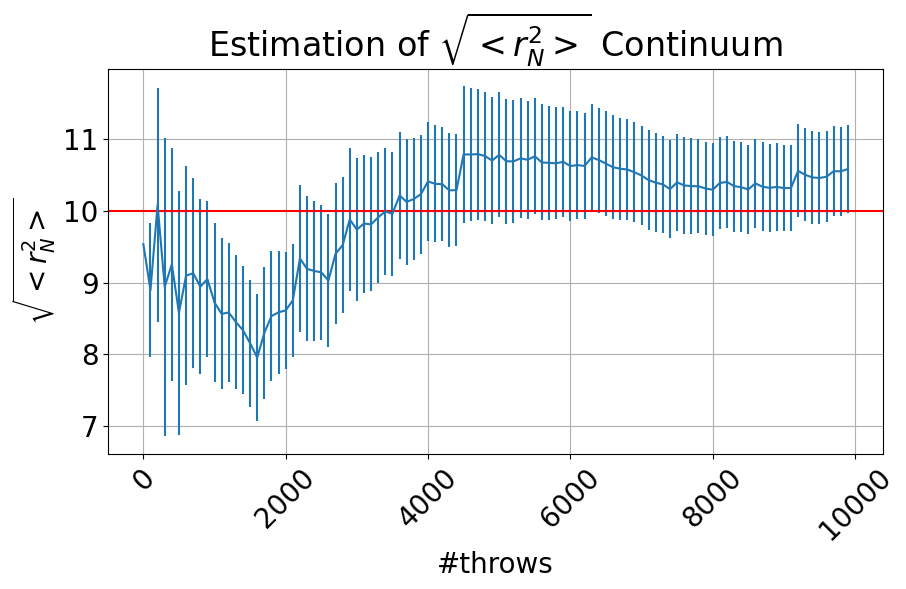

In [9]:
plt.errorbar(x1,data4["valCont"],yerr=data4["errCont"])
plt.axhline(y=10, color='r', linestyle='-')
plt.rcParams["figure.figsize"]=(10,5)
plt.title('Estimation of $\sqrt{<r_N^2>}$ Continuum')
plt.xticks(rotation = 45)
plt.xlabel('#throws')
plt.ylabel('$\sqrt{<r_N^2>}$')
plt.grid(True)
plt.show()

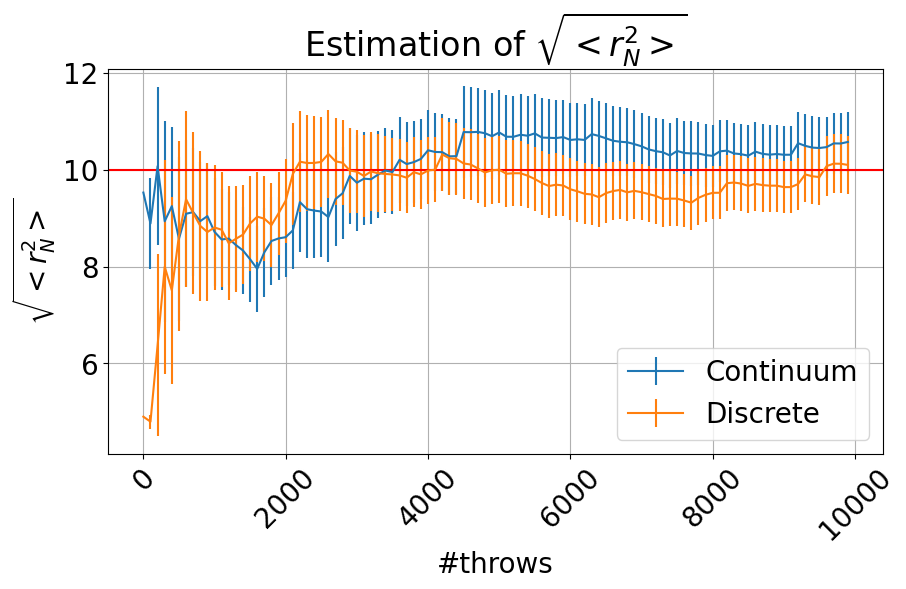

In [10]:
plt.rcParams["figure.figsize"]=(10,5)
plt.errorbar(x1,data4["valCont"],yerr=data4["errCont"], label="Continuum")
plt.errorbar(x1,data4["val"],yerr=data4["err"], label="Discrete")
plt.axhline(y=10, color='r', linestyle='-')
plt.legend(loc="lower right")
plt.title('Estimation of $\sqrt{<r_N^2>}$')
plt.xlabel('#throws')
plt.xticks(rotation = 45)
plt.ylabel('$\sqrt{<r_N^2>}$')
plt.grid(True)
plt.show()

### The "goal" of this exercise is to use random walk with discret and continuum steps in attempt to calcolate the square root of mean of the distance square from the origin. As we can see the results are statistically unrecognizable as we can expect.

### Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

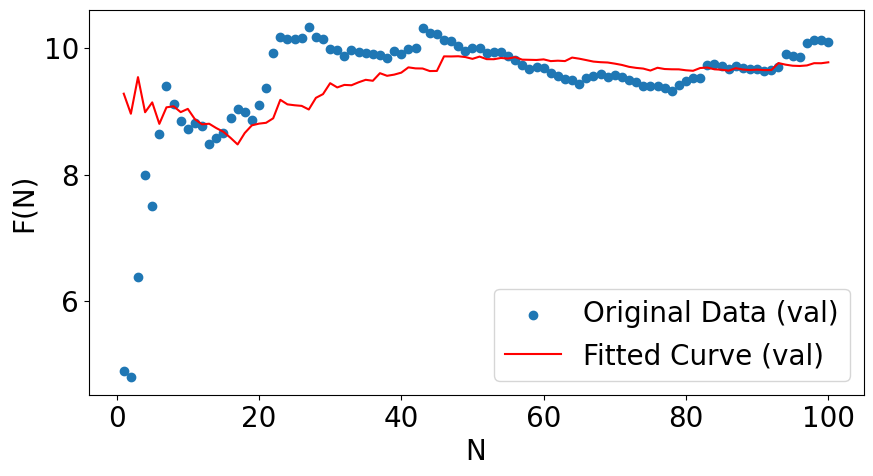

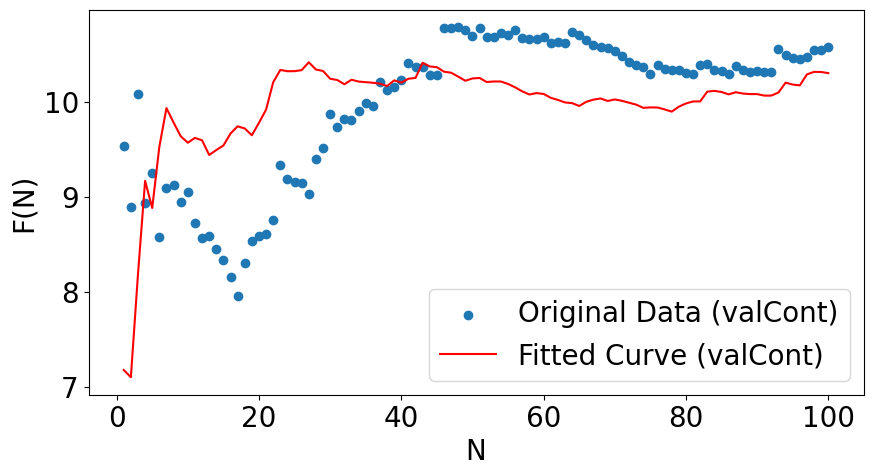

In [11]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

def diffusive_function(N, k):
    return k * np.sqrt(N)

val = np.array(data4["val"])
valCont = np.array(data4["valCont"])

#Perform the nonlinear regression analysis for val
popt_val, _ = optimize.curve_fit(diffusive_function, valCont, val)
k_val = popt_val[0]
fitted_values_val = diffusive_function(valCont, k_val)

#Perform the nonlinear regression analysis for valCont
popt_valCont, _ = optimize.curve_fit(diffusive_function, val, valCont)
k_valCont = popt_valCont[0]
fitted_values_valCont = diffusive_function(val, k_valCont)

N=np.arange(1, len(val) + 1)

#Visualize the results for val
plt.scatter(N, val, label='Original Data (val)')
plt.plot(N, fitted_values_val, 'r-', label='Fitted Curve (val)')
plt.xlabel('N')
plt.ylabel('F(N)')
plt.legend()
plt.show()

#Visualize the results for valCont
plt.scatter(N, valCont, label='Original Data (valCont)')
plt.plot(N, fitted_values_valCont, 'r-', label='Fitted Curve (valCont)')
plt.xlabel('N')
plt.ylabel('F(N)')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

#Calculate R-squared value and RMSE for val
r_squared_val=r2_score(val, fitted_values_val)
rmse_val=np.sqrt(mean_squared_error(val, fitted_values_val))
#Calculate R-squared value and RMSE for valCont
r_squared_valCont=r2_score(valCont, fitted_values_valCont)
rmse_valCont = np.sqrt(mean_squared_error(valCont, fitted_values_valCont))

print("R-squared value (val):", r_squared_val)
print("RMSE (val):", rmse_val)
print("R-squared value (valCont):", r_squared_valCont)
print("RMSE (valCont):", rmse_valCont)

R-squared value (val): 0.16561271453694693
RMSE (val): 0.8125597023675545
R-squared value (valCont): 0.0699554119000948
RMSE (valCont): 0.7439523373306411


### Plot the original data points and the fitted curve on the same graph. The data points closely follow the fitted curve, it suggests a potentially diffusive behavior.

### Goodness of fit metrics: calculate metrics such as the coefficient of determination or the root mean squared errorto quantitatively evaluate the quality of the fit. A high R-squared value close to 1 or a low RMSE value indicates a good fit and suggest a diffusive behavior.

### The results indicates a possible diffusive behavior**

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.